# **Esercizi extra - parte 1**

In questo notebook troviamo esercizi relativi alla prima parte del programma di numerica, di vario grado di difficoltà (indicato nel testo).

# **Zeri di funzioni**

### Esercizio 1

*Difficoltà: facile.*
Secondo l’equazione dei gas perfetti il volume specifico v dell’aria è dato da

$v=\dfrac{T R^\star}{p}$

dove $R^\star = 287.78\, J\, kg^{−1}\, K^{−1}$ . Per $T = 288\, K$, $p = 101325\, Pa$ si ottiene $v = 0.8180$ ossia densitá $\rho = 1.225\, kg m^{−3}$. Consideriamo ora la legge dei gas reali

$f(v)=\left(p+\dfrac{a}{v^2}\right)(vb-c)-dR^\star T=0$.

con $a = 1.2425e03$, $b = 2.8890e − 05$, $c = 3.8700e − 05$, $d = 1.0e − 5$ (dati non realistici).
Risolvere l’equazione dei gas reali con il metodo di bisezione partendo da un intervallo iniziale
adeguato. Che densità si ottiene? Calcolare il risultato con un errore massimo di $ϵ = 1.0e − 5$
stabilendo a priori il numero di iterazioni necessarie dato l’intervallo scelto.


In [37]:
# step 0 -> ricordarsi di importare i pacchetti numpy and matplotlib

import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

Definiamo la funzione e plottiamo il suo andamento.

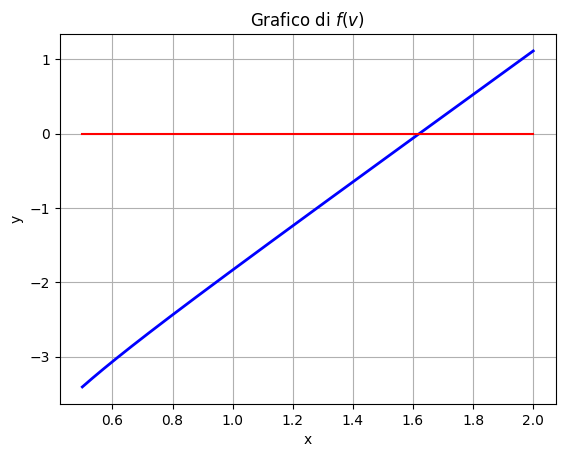

In [38]:
a = 1.2425e+03
b = 2.8890e-05
c = 3.8700e-05
d = 1.0e-5
R = 287.78
T = 288
p = 101325
f=lambda v: ( p + a / ( v *v ) ) * ( v * b - c) - d * R * T

# rappresentazione grafica
# discretizzazione dell'intervallo [-2 2]
xgrid=np.linspace(0.5,2,1000)
# plot di f
plt.plot(xgrid, f(xgrid),'b-',linewidth=2.0)
# plot asse y=0
plt.plot(xgrid,np.zeros(np.shape(xgrid)),'r-') # o semplicemente plt.plot([-2,2],[0,0],'r-')
# specifiche grafiche titolo, legenda, grid,
plt.title("Grafico di $f(v)$")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Implementiamo il metodo di bisezione:

In [39]:
# definizione del metodo di bisezione
def bisez(f, a, b, toll = 1e-6):

  # controllo se gli estremi sono una bracket (opzionale)
  if (f(a)*f(b)>=0):
   raise RuntimeError('ERRORE: l''intervallo [a,b] non è una bracket')

  # inizializzazione
  xvect = []

  while (abs(b-a)>toll):
    x = 0.5*(a+b)

    # primo controllo se x è uno zero (opzionale)
    if (f(x)==0):
      xvect.append(x)
      print("x è esattamente uno zero della funzione")
      break

    # metodo di bisezione
    if (f(a)*f(x)>0):
        a = x
    else:
        b = x

    xvect.append(x)

  return  np.array(xvect)

Dal grafico ottenuto osserviamo che possiamo scegliere come estremi iniziali $a_0 = 1$, $b_0 = 2$
ottenendo un intervallo iniziale di lunghezza $|I_0 | = |b_0 − a_0 | = 1$. Ricaviamo il numero di iterazioni necessarie come:

\begin{gather}
|e_k|\leq \dfrac{|I_0|}{2^{k+1}}=\epsilon\\
2^{k+1}=\epsilon^{-1} |I_0|\\
k=log_2 (\epsilon^{-1} |I_0|)-1
\end{gather}

In [40]:
N_it= np.log2(1.0e5)-1
print("Numero minimo di iterazioni", np.ceil(N_it))

Numero minimo di iterazioni 16.0


In [41]:
xvect = bisez(f, 1, 2, 1e-5)
print("Numero iterazioni: %d." % len(xvect))
print("Ultimo valore di x: %f" % xvect[-1])


Numero iterazioni: 17.
Ultimo valore di x: 1.621376


Nota: otteniamo 17 e non 16 perché subito dopo il calcolo del punto medio il contatore it nella
function viene incrementato. Al valore $v = 1.622368$ corrisponde una densità $\rho = 0.6164$.

### Esercizio 2



*Difficoltà: difficile.*
Si consideri il cinematismo in figura e si descriva la posizione del punto finale $P$ utilizzando i due
angoli e il sistema di riferimento indicati.

![kin.png](kin.png)

Imponendo $P = (2.5, 0)$, $L_1 = 2$, $L_2 = 1$, che angoli $\theta$ e $\beta$ si ottengono? Risolvere il sistema non-lineare con il metodo di Newton per sistemi per diversi valori della guess iniziale, con tolleranza
$\epsilon= 10^{-6}$. La soluzione è unica? Abbiamo sempre convergenza? Perché?

La posizione del punto $P$ é descritta dalla seguente legge:

\begin{equation}
\begin{cases}
x=L_1\cos\theta + L_2\cos \beta\\
y=L_1 \sin\theta - L_2 \sin \beta
\end{cases}
\end{equation}

Se imponiamo valori dati alle coordinate di $P$ otteniamo un sistema nonlineare di due equazioni
per le incognite $\theta$ e $\beta$, i due gradi di libertà del sistema:

\begin{equation}
\begin{cases}
f_1(\theta, \beta)=L_1\cos\theta + L_2\cos \beta-x_P\\
f_2(\theta,\beta)=L_1 \sin\theta - L_2 \sin \beta - y_P
\end{cases}
\end{equation}

Calcoliamo lo Jacobiano:

\begin{equation}
J=\left(\begin{array}{cc}  -L_1 \sin\theta & -L_2\sin\beta \\ L_1\cos\theta & -L_2 \cos\beta    \end{array}\right)
\end{equation}

Definiamo i dati, raggruppando le incognite nel vettore $\mathbf{x}$:

In [42]:
L1 = 2
L2 = 1
xp = 2.5
yp = 0
f=lambda x: np.array([L1*np.cos(x[0])+ L2*np.cos(x[1]) - xp , L1*np.sin(x[0])-L2*np.sin(x[1]) - yp])

J=lambda x: np.array([[-L1*np.sin(x[0]), -L2*np.sin(x[1])],
                    [L1*np.cos(x[0]), -L2*np.cos(x[1]) ] ]  )

Adattiamo il metodo di Newton al caso di sistemi di equazioni nonlineari:

In [43]:
# Definizione del metodo di Newton (questa è già la versione modificata)
def newton (f,J,x0,nmax=100,toll=1e-6) :

  xold = x0

  for nit in range(nmax) :
    dx=scipy.linalg.solve(J(xold),f(xold))
    # calcolo il nuovo punto
    xnew=xold-dx
    # criterio di arresto e aggiorno
    if (np.linalg.norm(dx) < toll) :
        break
    else :
        xold=xnew

  return xold,nit


In [44]:
sol,it=newton (f,J,np.array([0.1,0.1]),100,1.0e-6)
print("convergo a",sol, "in ",it, " iterazioni")

convergo a [0.38976075 0.86321194] in  6  iterazioni


Notiamo che con questa scelta dei dati iniziali convergiamo in 6 iterazioni e gli angoli corrispondenti, convertiti in gradi, sono $\theta=22.2^\circ$, $\beta=49.5^\circ$, mentre, ad esempio, partendo da $\theta=0$, $\beta=0$ il metodo si arresta perch\'e lo jacobiano diventa singolare. Infine, proviamo a partire da una guess iniziale opposta:

In [45]:
sol,it=newton (f,J,np.array([-0.1,-0.1]),100,1.0e-6)
print("convergo a",sol, "in ",it, " iterazioni")

convergo a [-0.38976075 -0.86321194] in  6  iterazioni


Notiamo che la soluzione non \`e unica, infatti in questo caso otteniamo angoli opposti.

## Sistemi lineari

### Esercizio 3

*Difficoltà: media.*

Si costruisca la matrice di Vandermonde di dimensione 10 × 10 con il comando np.vander. L’elemento vij di tale matrice è costruito come $v_{ij} = x_i^{n−j−1}$ il numero di righe e xi sono gli elementi del vettore dato in input. La matrice di Vandermonde può essere usata nella costruzione dei polinomi interpolanti su nodi $x_i$ ed è  notoriamente malcondizionata.

In [46]:
V=np.vander(np.linspace(1,10,10))

Si costruisca un termine noto $\mathbf{b}$ tale che la soluzione esatta sia $x_e =(1, 1, 1, 1, \ldots, 1)^T$ .

In [47]:
xe = np.ones(10).T
b=V@xe

Si costruisca ora un termine noto perturbato $\mathbf{b} + \delta\mathbf{b}$ dove la perturbazione $\delta\mathbf{b}$ è un vettore di numeri random compresi fra 0 e 0.1. Suggerimento: usare il comando numpy.random.rand(nrows,ncols) e riscalare il vettore ottenuto.

In [48]:
db=0.1*np.random.rand(10)
print(db)

[0.02660417 0.02588424 0.08960441 0.0665684  0.04616058 0.0869962
 0.06197872 0.05752185 0.07912997 0.01825655]


Si risolva il sistema perturbato con la fattorizzazione LU, verificando se è stato eseguito il
pivoting. Si calcoli la soluzione $\mathbf{x} + \delta\mathbf{x}$ utilizzando i metodi di sostituzione opportuni.

In [49]:
P, L, U = scipy.linalg.lu(V)
# verifica che la matrice è la matrice identità
if (P == np.eye(10)).all():
    print("P=I, no pivoting")
else:
    print('Pivoting effettuato')

Pivoting effettuato


Copiamo le function per la sostituzione avanti/indietro:

In [50]:
def fwsub(A,b):
    n = b.shape[0]
    # inizializzo il vettore
    x = np.zeros(n)
    # costruzione forward substitution
    x[0] = b[0]/A[0,0]
    for i in range(1,n):
        x[i] = (b[i] - A[i,0:i] @ x[0:i]) / A[i,i]
    return x

def bksub(A,b):
    n = b.shape[0]
    # inizializzo il vettore
    x = np.zeros(n)
    # costruzione forward substitution
    x[-1] = b[-1]/A[-1,-1]
    for i in range(n-2,-1,-1):
        x[i] = (b[i] - A[i,i+1:n] @ x[i+1:n]) / A[i,i]
    return x

In [51]:
y = fwsub(L, P.T@(b+db))
x_pert = bksub(U, y)
print(x_pert)

[  1.00001072   0.99947602   1.01091395   0.87364681   1.88991274
  -2.92231512  11.71852851 -16.3387054   15.93544827  -4.14031232]


Si verifichi se è soddisfatta la stima teorica relativa alla stabilità del metodo di eliminazione
di Gauss che prevede che

$$\dfrac{\|\delta \mathbf{x}\|}{\|\mathbf{x}\|}\leq K(V) \dfrac{\|\delta \mathbf{b}\|}{\|\mathbf{b}\|}$$

dove K(V) è il condizionamento della matrice e $\delta \mathbf{x}$ si ottiene per differenza con la soluzione
esatta (nota).

In [52]:
rel_err=np.linalg.norm(xe-x_pert)/np.linalg.norm(xe)
KV=np.linalg.cond(V)
if (rel_err<KV*np.linalg.norm(db)/np.linalg.norm(b)):
    print("la stima è verificata")
    print("errore relativo=",rel_err)
    print("KV= %.4e" %KV)
    print("perturbazione termine noto (normalizzata)=",np.linalg.norm(db)/np.linalg.norm(b))


la stima è verificata
errore relativo= 8.253487560826173
KV= 2.1063e+12
perturbazione termine noto (normalizzata)= 1.6032544926721194e-10


### Esercizio 4

*Difficoltà: dfficile.*

Si consideri la matrice A allegata, da importare con il comando

In [53]:
matrix = np.loadtxt('matrice.txt')
A=scipy.sparse.coo_matrix((matrix[:,2], (matrix[:,0].T.astype(int),matrix[:,1].T.astype(int)))).toarray()

Si costruisca il termine noto b del sistema lineare $A\mathbf{x} = \mathbf{b}$ tale che la soluzione esatta sia $\mathbf{x}_e = [1, 1, ...]^T$ . (Nota: determinare le dimensioni della matrice $A$ con il comando shape.

In [54]:
n,m=np.shape(A)
print(n)
xe=np.ones(n).T
b=A@xe

725


Calcolare il numero di condizionamento della matrice.

In [55]:
K=np.linalg.cond(A)
print(K)

12176.579615307353


Vogliamo risolvere il sistema lineare con il metodo di Richardson statico. Calcolare il parametro $\alpha_{max}$ massimo per avere convergenza, e il parametro $\alpha_{opt}$ che garantisce il raggio spettrale minimo per la matrice di convergenza considerando come precondizionatore la matrice identità.

In [56]:
from scipy.linalg import eigvals
lambda_max = np.max(np.abs(eigvals(A)))
lambda_min = np.min(np.abs(eigvals(A)))
alpha_max = 2/(lambda_max)
alpha_opt = 2/(lambda_max+lambda_min)
print(alpha_max, alpha_opt)

0.32778809021714816 0.32776117287391804


Implementare una function per risolvere il sistema lineare con il metodo di Richardson. La funzione riceve in input la matrice, il termine noto, la guess iniziale $x_0$ , il precondizionatore $P$, il parametro $\alpha$, la tolleranza tol e il numero massimo di iterazioni nmax, e restituisce in output il vettore soluzione e il numero di iterazioni effettuate.

In [57]:
def richardson_solve(A, b, x0, P, alpha, nmax, rtoll):
    r = A @ x0 - b
    bnorm = np.linalg.norm(b)
    k = 0
    xiter = [x0]
    while( (np.linalg.norm(r)/bnorm) > rtoll and k<nmax):
        xold = xiter[-1]
        dx = np.linalg.solve(P,alpha*r)
        xnew = xold +dx
        xiter.append(xnew)
        r = b-A @ xnew
        k = k+1
    return xiter,k

Risolvere il sistema con la function scritta e i seguenti dati: il vettore nullo come guess iniziale, precondizionatore pari alla matrice identità, $\alpha=\alpha_{opt}$, nmax=1000 e tol=1.0e-6. Cosa si osserva?


In [58]:
xiter,k = richardson_solve(A,b,np.zeros(n), np.eye(n), alpha_opt, 1000, 1.0e-6)
print(k)

1000


Osserviamo che il metodo non converge nel numero di iterazioni prescritto. Infatti l'errore relativo è ancora molto alto:

In [59]:
print(np.linalg.norm(xiter[-1]-xe)/np.linalg.norm(xe))

0.8445671774800815


Eseguire la fattorizzazione LU della matrice A e ripetere il punto precedente usando come precondizionatore P = L. Cosa si osserva? Come si spiega questo risultato? (Calcolare il numero di condizionamento di $L^{−1} A$).



In [60]:
PIV, L, U = scipy.linalg.lu(A)
P=L
P_A=scipy.linalg.solve(P,A)   #calcolo P^-1A sfruttando il fatto che è triangolare
lambda_max = np.max(np.abs(eigvals(P_A)))  #ricalcolo gli autovalori e gli alpha
lambda_min = np.min(np.abs(eigvals(P_A)))
alpha_opt = 2/(lambda_max+lambda_min)
xiter,k = richardson_solve(A,b,np.zeros(n), P, alpha_opt, 1000, 1.0e-6)
print(k)
print(np.linalg.cond(P_A))

123
372.8575696506422


Osserviamo anche che la matrice $P$ non è simmetrica, infatti il condizionamento trovato NON corrisponde al rapporto fra il massimo e minimo autovalore che risulterebbe

In [61]:
print(lambda_max/lambda_min)

14.127263857180967


### Esercizio 5

*Difficoltà: media.*

Si consideri la matrice A allegata, da importare con il comando

In [62]:
matrix = np.loadtxt('matrice.txt')
A=scipy.sparse.coo_matrix((matrix[:,2], (matrix[:,0].T.astype(int),matrix[:,1].T.astype(int)))).toarray()

Si costruisca il termine noto $\mathbf{b}$ del sistema lineare $A\mathbf{x} = \mathbf{b}$ tale che la  soluzione esatta sia $\mathbf{x}_e = [1, 1, ...]^T$. (Nota: determinare le dimensioni della matrice A con il comando shape).

In [63]:
n,m=np.shape(A)
print(n)
xe=np.ones(n).T
b=A@xe

725


Calcolare il numero di condizionamento della matrice.

In [64]:
K=np.linalg.cond(A)
print(K)

12176.579615307353


Verificare che la matrice è simmetrica e definita positiva.

In [65]:
print("simmetrica?",np.min(np.abs(A-A.T))<1e-15)
lambda_min=np.min(eigvals(A))
print("definita positiva?",lambda_min>0)


simmetrica? True
definita positiva? True


Risolvere il sistema con il metodo del gradiente (gdescent) e i seguenti dati: il vettore nullo come guess iniziale, nmax=1000 e tol=1.0e-6. Cosa si osserva?

In [66]:
from utils import gdescent
xg = gdescent(A, b, np.zeros(n), nmax = 1000, rtoll = 1e-6)
print("Soluzione approssimata (Gradient descent):")
print(xg[-1])

Soluzione approssimata (Gradient descent):
[1.         0.15643625 0.12177743 0.15636829 0.63682208 0.51241335
 0.43707034 0.38426187 0.34397654 0.31163152 0.28448519 0.2619033
 0.24271719 0.22599495 0.21177653 0.19944253 0.18898463 0.18028577
 0.17303055 0.16712251 0.16243244 0.15934452 0.15731083 0.15653224
 0.15603581 0.15506617 0.15372212 0.15200754 0.14991954 0.14761738
 0.14514975 0.1425329  0.13975374 0.13702938 0.13438213 0.13188849
 0.12957742 0.12746655 0.12560624 0.12402744 0.12302237 0.12226988
 0.12229336 0.1230817  0.12419419 0.12569924 0.12751804 0.12955976
 0.13183001 0.13434964 0.13700441 0.13961763 0.14226461 0.14483446
 0.14731826 0.1496911  0.1517864  0.15350046 0.15483963 0.15589037
 0.15644752 0.15728009 0.159338   0.16259271 0.16719239 0.17311709
 0.18043622 0.189161   0.19964427 0.21194477 0.22604233 0.24266421
 0.26189228 0.28454157 0.3114605  0.34392756 0.38444554 0.43621047
 0.51287168 0.63664891 0.17382334 0.40088708 0.16002488 0.12538674
 0.15948416 0.156888

Notiamo che la soluzione è molto lontana da quella esatta, la convergenza è estremamente lenta.

Verificare la stima teorica per l'abbattimento dell'errore con il metodo del gradiente.

Sappiamo, dalla teoria, che l’errore all’iterazione n-sima soddisfa la seguente stima:

$$\|\mathbf{e}^k\|_A<C^k\|\mathbf{e}^0\|_A$$

con $C=\dfrac{K(A)-1}{K(A)+1}$.

In [67]:
e0=xg[0]-xe
ek=xg[-1]-xe
norm_e0=(e0.T@A@e0)**0.5
norm_ek=(ek.T@A@ek)**0.5
C=(K-1)/(K+1)
nit=len(xg)
print("la stima è soddisfatta?", norm_ek<C**nit*norm_e0)


la stima è soddisfatta? True


Ora, risolvere lo stesso problema, con gli stessi dati, utilizzando il metodo del gradiente coniugato allegato di seguito. Il metodo raggiunge la tolleranza desiderata? In quante iterazioni? Verificare che la convergenza soddisfa la stima teorica.

In [85]:
def cgdescent(A, b, x0, nmax = 1000, rtoll = 1e-6):
  """
  Metodo del gradiente a parametro dinamico per sistemi lineari.

  Input:
   A      Matrice del sistema
   b      Termine noto (vettore)
   x0     Guess iniziale (vettore)
   nmax   Numero massimo di iterazioni
   toll   Tolleranza sul test d'arresto (sul residuo relativo)

  Output:
   xiter  Lista delle iterate

  """
  norm = np.linalg.norm

  bnorm = norm(b)

  r = b - A@x0

  xiter = [x0]
  iter = 0
  z = r

  while((norm(r) / bnorm)>rtoll  and iter < nmax):
      xold = xiter[-1]

      rho = np.dot(r, z)
      q = A @ z;
      alpha = rho / np.dot(z, q)
      xnew = xold + alpha * z
      r = r - alpha*q
      beta = (r.T @ A @ z)/(z.T @ A @ z)
      z = r - beta*z
      xiter.append(xnew)
      iter = iter + 1

  return xiter

In [86]:
xcg = cgdescent(A, b, np.zeros(n), nmax = 1000, rtoll = 1e-6)
print("numero di iterazioni:")
print(len(xcg))


Soluzione approssimata (Gradient descent):
121


Il metodo converge in 121 iterazioni. Verifichiamo che il metodo soddisfa:

$$\|\mathbf{e}^k\|_A<\dfrac{2c^k}{1+c^{2k}}\|\mathbf{e}^0\|_A$$

con $c=\dfrac{\sqrt{K(A)}-1}{\sqrt{K(A)}+1}$.

In [89]:
e0=xcg[0]-xe
ek=xcg[-1]-xe
norm_e0=(e0.T@A@e0)**0.5
norm_ek=(ek.T@A@ek)**0.5
c=(K**0.5-1)/(K**0.5+1)
nit=len(xcg)
cost=(c**nit)/(1+c**(2*nit))
print("la stima è soddisfatta?", norm_ek<cost*norm_e0)


la stima è soddisfatta? True
